# 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# 2. Load Data

In [2]:
sales_df = pd.read_csv('../Data/Sales.csv')
items_df = pd.read_csv('../Data/item.csv')
promotion_df = pd.read_csv('../Data/Promotion.csv')
supermarkets_df = pd.read_csv('../Data/Supermarkets.csv')

In [3]:
sales_df.head()

,code,amount,units,time,province,week,customerId,supermarket,basket,day,voucher
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0


In [4]:
items_df.head()

,code,descrption,type,brand,size
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX,Type 1,Aunt Jemima,2 LB
1,3000005070,A/JEM COMPLETE PANCAKE MI,Type 1,Aunt Jemima,32 OZ
2,3000005300,AJ BUTTERMILK PANCAKE MIX,Type 1,Aunt Jemima,32 OZ
3,3000005350,A J BTRMLK COMP PNCK MIX,Type 1,Aunt Jemima,1 LB
4,1600015760,BC PANCAKE MIX BUTTERMILK,Type 1,Bisquick,6.75 OZ


In [5]:
promotion_df.head()

,code,supermarkets,week,feature,display,province
0,2700042240,285,91,Not on Feature,Mid-Aisle End Cap,2
1,2700042292,285,92,Interior Page Feature,Not on Display,2
2,2700042274,285,92,Interior Page Feature,Not on Display,2
3,2700042273,285,92,Interior Page Feature,Not on Display,2
4,2700042254,285,92,Interior Page Feature,Not on Display,2


In [6]:
supermarkets_df.head()

,supermarket_No,postal-code
0,199,30319
1,200,30134
2,201,30066
3,202,31093
4,203,30542


# 3. Data Exploration

In [7]:
#Inspect the data structure
for df_name, df in zip(['Sales', 'Items', 'Promotion', 'Supermarkets'], 
                       [sales_df, items_df, promotion_df, supermarkets_df]):
    print(f"\n{df_name} DataFrame:")
    print(df.info())
    print("\nFirst few rows:")
    print(df.head())


Sales DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   code         1048575 non-null  int64  
 1   amount       1048575 non-null  float64
 2   units        1048575 non-null  int64  
 3   time         1048575 non-null  int64  
 4   province     1048575 non-null  int64  
 5   week         1048575 non-null  int64  
 6   customerId   1048575 non-null  int64  
 7   supermarket  1048575 non-null  int64  
 8   basket       1048575 non-null  int64  
 9   day          1048575 non-null  int64  
 10  voucher      1048575 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 88.0 MB
None

First few rows:
         code  amount  units  time  province  week  customerId  supermarket  \
0  7680850106    0.80      1  1100         2     1      125434          244   
1  3620000470    3.59      1  1100         2     1      125434   

In [8]:
# Check for missing values
for df_name, df in zip(['Sales', 'Items', 'Promotion', 'Supermarkets'], 
                       [sales_df, items_df, promotion_df, supermarkets_df]):
    print(f"\nMissing values in {df_name} DataFrame:")
    print(df.isnull().sum())


Missing values in Sales DataFrame:
code           0
amount         0
units          0
time           0
province       0
week           0
customerId     0
supermarket    0
basket         0
day            0
voucher        0
dtype: int64

Missing values in Items DataFrame:
code          0
descrption    0
type          0
brand         0
size          0
dtype: int64

Missing values in Promotion DataFrame:
code            0
supermarkets    0
week            0
feature         0
display         0
province        0
dtype: int64

Missing values in Supermarkets DataFrame:
supermarket_No    0
postal-code       0
dtype: int64


In [9]:
# Check for duplicate values
for df_name, df in zip(['Sales', 'Items', 'Promotion', 'Supermarkets'], 
                       [sales_df, items_df, promotion_df, supermarkets_df]):
    print(f"\Duplicate values in {df_name} DataFrame:")
    print(df.duplicated().sum())

\Duplicate values in Sales DataFrame:
0
\Duplicate values in Items DataFrame:
0
\Duplicate values in Promotion DataFrame:
0
\Duplicate values in Supermarkets DataFrame:
0


In [10]:
# Get a statistical summary
for df_name, df in zip(['Sales', 'Items', 'Promotion', 'Supermarkets'], 
                       [sales_df, items_df, promotion_df, supermarkets_df]):
    print(f"\nStatistical summary of {df_name} DataFrame:")
    print(df.describe())


Statistical summary of Sales DataFrame:
               code        amount         units          time      province  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   6.067646e+09  1.780470e+00  1.188219e+00  1.543165e+03  1.441374e+00   
std    3.154184e+09  5.966503e+00  5.466197e-01  3.833751e+02  4.965514e-01   
min    1.111124e+08 -8.280000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
25%    3.620000e+09  9.900000e-01  1.000000e+00  1.259000e+03  1.000000e+00   
50%    5.100003e+09  1.500000e+00  1.000000e+00  1.601000e+03  1.000000e+00   
75%    9.999982e+09  2.190000e+00  1.000000e+00  1.824000e+03  2.000000e+00   
max    9.999986e+09  5.900000e+03  1.000000e+02  2.359000e+03  2.000000e+00   

               week    customerId   supermarket        basket           day  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.347071e+01  2.003481e+05  1.980431e+02  3.333491e+05  9.119343e+01   
std    8.5

Observations:

-There are no missing values, duplicates in any of the datasets, which is good for analysis.

-The Sales DataFrame contains transaction-level data, with each row likely representing a single purchase.

-The Items DataFrame provides details about each product.

-The Promotion DataFrame seems to contain information about promotional activities for specific products in specific supermarkets and weeks.

-The Supermarkets DataFrame provides location information for each supermarket.

-'amount' ranges from -8.28 to 5900.0, with a mean of 1.78.

-'time' ranges from 0 to 2359, likely representing time of day.

-The difference in 'week' ranges between Sales and Promotion DataFrames needs to be addressed.

# 4. Data Preprocessing

Clean sales_df column

In [11]:
#Handle negative values in 'amount' column
print(f"Negative amounts before: {(sales_df['amount'] < 0).sum()}")
sales_df['amount'] = sales_df['amount'].abs()
print(f"Negative amounts after: {(sales_df['amount'] < 0).sum()}")

Negative amounts before: 1151
Negative amounts after: 0


In [12]:
# Investigate the 'time' column
print("Unique values in 'time' column:")
print(sales_df['time'].unique())
print("\nValue counts of 'time' column:")
print(sales_df['time'].value_counts().head())
print("\nDatatype of 'time' column:", sales_df['time'].dtype)


Unique values in 'time' column:
[1100 1137 1148 ...  531  328  438]

Value counts of 'time' column:
time
1738    2027
1734    2025
1718    2025
1713    2023
1745    2020
Name: count, dtype: int64

Datatype of 'time' column: int64


In [13]:
# Convert 'time' to a standard time format
def convert_time(time_value):
    time_str = f"{time_value:04d}"  # Pad with leading zeros
    return f"{time_str[:2]}:{time_str[2:]}"

sales_df['time'] = sales_df['time'].apply(convert_time)
sales_df['time'] = pd.to_datetime(sales_df['time'], format='%H:%M').dt.time

In [14]:
print("\nConverted 'time' column:")
print(sales_df['time'].head())
print("\nUnique values in converted 'time' column:")
print(sales_df['time'].nunique())


Converted 'time' column:
0    11:00:00
1    11:00:00
2    11:37:00
3    11:48:00
4    13:23:00
Name: time, dtype: object

Unique values in converted 'time' column:
1440


In [15]:
#handle week 
# Print original week ranges
print("Original week range in Sales DataFrame:", sales_df['week'].min(), "-", sales_df['week'].max())
print("Original week range in Promotion DataFrame:", promotion_df['week'].min(), "-", promotion_df['week'].max())


Original week range in Sales DataFrame: 1 - 28
Original week range in Promotion DataFrame: 43 - 104


In [16]:
# Align weeks between sales and promotions
min_week_promo = promotion_df['week'].min()
sales_df['week'] = sales_df['week'] + min_week_promo - 1

In [17]:
# Print new week range in Sales DataFrame#
print("New week range in Sales DataFrame:", sales_df['week'].min(), "-", sales_df['week'].max())


New week range in Sales DataFrame: 43 - 70


Outlier Detection and Removal


In [18]:
# Outlier Analysis
def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [19]:
def describe_with_outliers(df, column):
    desc = df[column].describe()
    IQR = desc['75%'] - desc['25%']
    lower_bound = desc['25%'] - 1.5 * IQR
    upper_bound = desc['75%'] + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"\nDescription of {column}:")
    print(desc)
    print(f"\nNumber of outliers in {column}: {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"Min outlier value: {outliers[column].min()}")
    print(f"Max outlier value: {outliers[column].max()}")

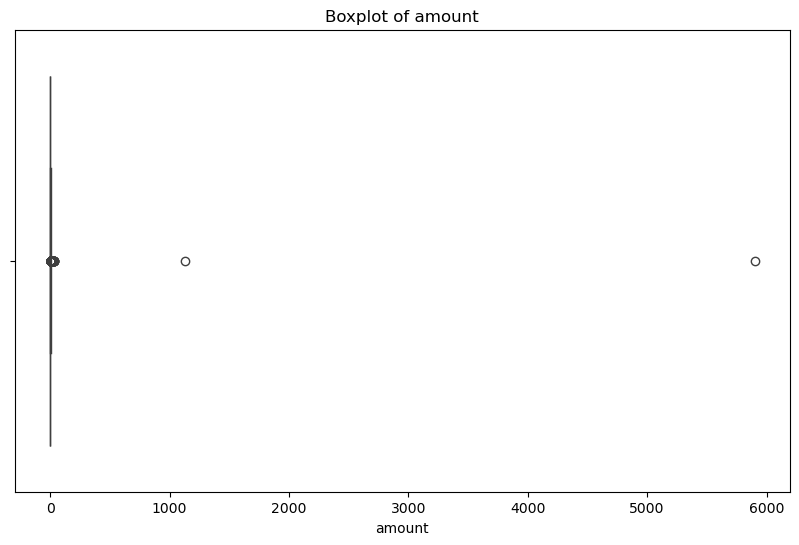


Description of amount:
count    1.048575e+06
mean     1.781032e+00
std      5.966335e+00
min      0.000000e+00
25%      9.900000e-01
50%      1.500000e+00
75%      2.190000e+00
max      5.900000e+03
Name: amount, dtype: float64

Number of outliers in amount: 38847
Percentage of outliers: 3.70%
Min outlier value: 3.99
Max outlier value: 5900.0


In [20]:
# Visualize and describe outliers in 'amount' before removing them
plot_boxplot(sales_df, 'amount')
describe_with_outliers(sales_df, 'amount')

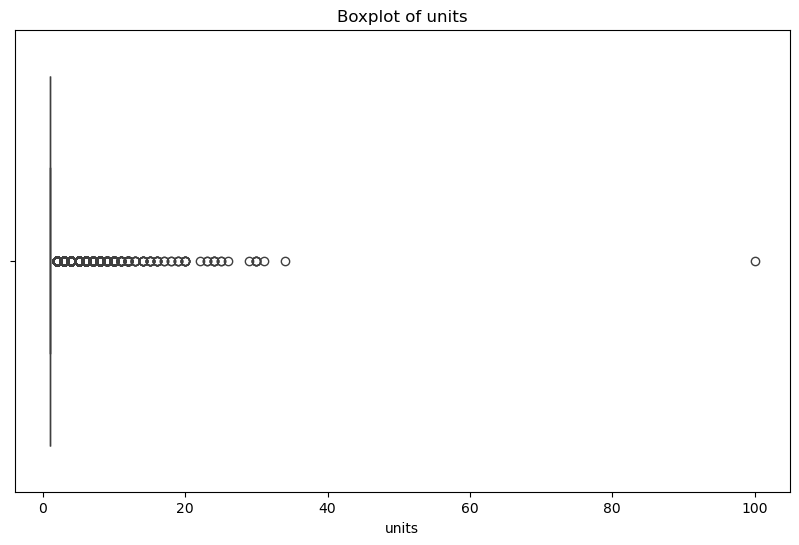


Description of units:
count    1.048575e+06
mean     1.188219e+00
std      5.466197e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+02
Name: units, dtype: float64

Number of outliers in units: 158631
Percentage of outliers: 15.13%
Min outlier value: 2
Max outlier value: 100


In [21]:
# Visualize and describe outliers in 'units' before removing them
plot_boxplot(sales_df, 'units')
describe_with_outliers(sales_df, 'units')

In [22]:
# 1. Handle outliers in 'amount' and 'units'
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [23]:
sales_df = remove_outliers(sales_df, 'amount')
sales_df = remove_outliers(sales_df, 'units')

In [24]:
print("\nAfter removing outliers:")
describe_with_outliers(sales_df, 'amount')


After removing outliers:

Description of amount:
count    879162.000000
mean          1.569746
std           0.779690
min           0.000000
25%           0.990000
50%           1.340000
75%           2.000000
max           3.970000
Name: amount, dtype: float64

Number of outliers in amount: 10779
Percentage of outliers: 1.23%
Min outlier value: 3.54
Max outlier value: 3.97


In [25]:
print("\nAfter removing outliers:")
describe_with_outliers(sales_df, 'units')


After removing outliers:

Description of units:
count    879162.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: units, dtype: float64

Number of outliers in units: 0
Percentage of outliers: 0.00%
Min outlier value: nan
Max outlier value: nan


In [26]:
sales_df['amount'].describe()

count    879162.000000
mean          1.569746
std           0.779690
min           0.000000
25%           0.990000
50%           1.340000
75%           2.000000
max           3.970000
Name: amount, dtype: float64

In [27]:
sales_df= sales_df[sales_df['amount']<= 3.5]
sales_df


,code,amount,units,time,province,week,customerId,supermarket,basket,day,voucher
0,7680850106,0.80,1,11:00:00,2,43,125434,244,1,1,0
2,1800028064,2.25,1,11:37:00,2,43,108320,244,2,1,0
3,9999985067,0.85,1,11:48:00,2,43,162016,244,3,1,0
4,9999985131,2.19,1,13:23:00,2,43,89437,244,4,1,0
5,5100002794,2.19,1,13:23:00,2,43,89437,244,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1048564,9999985028,0.79,1,16:31:00,2,70,75538,284,665444,190,0
1048567,3620000350,0.99,1,10:51:00,2,69,40882,346,665446,189,0
1048568,9999900443,0.99,1,10:51:00,2,69,40882,346,665446,189,0
1048570,1510000011,2.35,1,13:07:00,2,69,43825,346,665448,189,0


In [28]:
sales_df['amount'].count()

868383

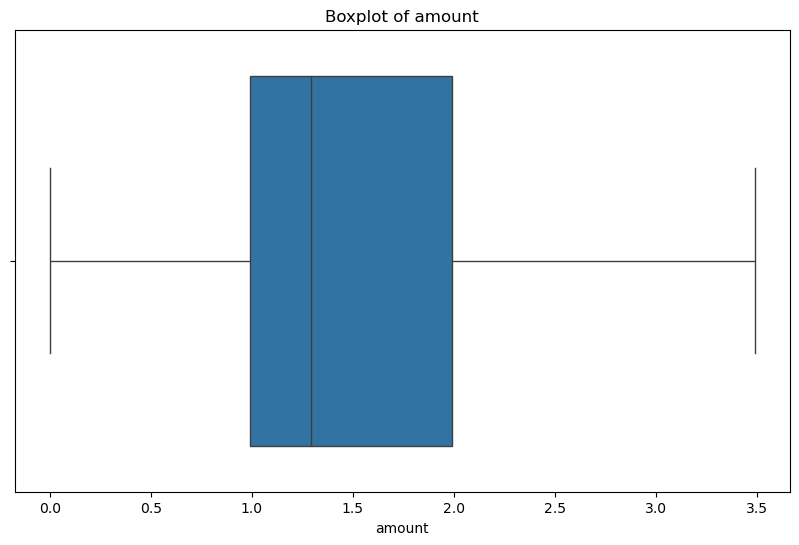

In [29]:
# Plot boxplots after removing outliers
plot_boxplot(sales_df, 'amount')


Clean itesm_df

In [30]:
items_df = pd.read_csv('../Data/item.csv')


In [31]:
items_df.head()

,code,descrption,type,brand,size
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX,Type 1,Aunt Jemima,2 LB
1,3000005070,A/JEM COMPLETE PANCAKE MI,Type 1,Aunt Jemima,32 OZ
2,3000005300,AJ BUTTERMILK PANCAKE MIX,Type 1,Aunt Jemima,32 OZ
3,3000005350,A J BTRMLK COMP PNCK MIX,Type 1,Aunt Jemima,1 LB
4,1600015760,BC PANCAKE MIX BUTTERMILK,Type 1,Bisquick,6.75 OZ


In [32]:
# Clean items_df
items_df['type'] = items_df['type'].str.extract('(\d+)').astype(int)
items_df['brand'] = items_df['brand'].str.lower()

In [33]:
#summary statistics of items_df
print(items_df['type'].value_counts())
print(items_df['brand'].value_counts())
print(items_df['size'].value_counts())

type
2    448
3    294
4    139
1     46
Name: count, dtype: int64
brand
private label            71
barilla                  50
ragu                     47
private label premium    43
prego                    40
                         ..
m c                       1
pomi                      1
rac                       1
classique                 1
vermont gold              1
Name: count, Length: 131, dtype: int64
size
16 OZ        211
26 OZ        108
12 OZ        100
24 OZ         47
8 OZ          36
            ... 
KH# 71916      1
26 OUNCE       1
KH# 8652       1
31 1/2 OZ      1
14.5 OZ        1
Name: count, Length: 146, dtype: int64


In [34]:
items_df['size'].unique()

array(['2 LB', '32    OZ', '32 OZ', '1 LB', '6.75 OZ', '7 OZ', '7.75 OZ',
       '1.5 LB', '16 OZ', '5 OZ', '10.5 OZ', ' ', '37 OZ', '28 OZ',
       '12.00Z', '5.5 OZ', '24 OUNCE', '24    OZ', '24 OZ', '2.5 OZ',
       '6 1/2 OZ', '12 OZ', '8.5 OZ', '8 OZ', 'KH# 2793', '16    OZ',
       '16 OUNCE', '9    OZ', '12 OUNCE', 'CUST REQST', '8    OZ', '16OZ',
       '15 OZ', '14 OZ', '13 OZ', '13OZ FMLY', '6.5 OZ', '12.7 OZ',
       '17.6 OZ', '10 OZ', 'N     1 LB', '16  OZ', '16  Z', '17.5 OZ',
       'KH# 6862', 'P    16 OZ', 'P    12 OZ', '7    OZ', 'P     1 LB',
       'KH# 8652', 'KH# 8651', 'KH# 8623', 'KH# 13384', 'KH# 8525',
       'KH# 8627', '17 OZ', '%KH# 9390', 'KH# 18280', 'KH# 18283',
       'KH# 18277', '13.25 OZ', 'NO TAG', '16.00  OZ', 'N    16 OZ',
       'KH# 20749', '7.25 OZ', '##########', '8 OUNCE', '3LB', '17.7 OZ',
       '6 OZ', '10OZ', 'N     7 OZ', '32OZ', '48 OZ', '8.8 OZ', '4 LB',
       'KH# 39724', 'SO   16 OZ', 'CR   16 OZ', '3.5 OZ', '2.8 OZ',
       '31.5 O

In [35]:
items_df['size'].count()

927

In [36]:
print("Unique item types:")
print(items_df['type'].value_counts())


Unique item types:
type
2    448
3    294
4    139
1     46
Name: count, dtype: int64


In [37]:
print(items_df['size'].value_counts())


size
16 OZ        211
26 OZ        108
12 OZ        100
24 OZ         47
8 OZ          36
            ... 
KH# 71916      1
26 OUNCE       1
KH# 8652       1
31 1/2 OZ      1
14.5 OZ        1
Name: count, Length: 146, dtype: int64


In [38]:
import re
def clean_size_oz(size):
    if pd.isna(size) or size.strip() == '':
        return None
    
    # Remove 'KH#' entries
    if 'KH#' in size:
        return None
    
    # Remove '%' entries
    if '%' in size:
        return None
    
    # Convert to uppercase and remove extra spaces
    size = size.upper().strip()
    
    # Extract numeric value
    match = re.match(r'(\d+(?:\.\d+)?)', size)
    if not match:
        return None
    
    value = float(match.group(1))
    
    # Convert LB to OZ
    if 'LB' in size:
        value *= 16
    
    return value

# Apply the cleaning function
items_df['size_oz'] = items_df['size'].apply(clean_size_oz)

# Remove rows with None values
items_df = items_df.dropna(subset=['size_oz'])

# Round to 2 decimal places
items_df['size_oz'] = items_df['size_oz'].round(2)

# Check unique values
print(items_df['size_oz'].unique())

# statistics
print(items_df['size_oz'].describe())

[32.   16.    6.75  7.    7.75 24.    5.   10.5  37.   28.   12.    5.5
  2.5   6.    8.5   8.    9.   15.   14.   13.    6.5  12.7  17.6  10.
 17.5  17.   13.25  7.25 48.   17.7   8.8  64.    3.5   2.8  31.5  31.
 26.   23.    6.3  26.5  25.   15.5  25.5   1.1  11.6  27.75 67.   25.75
 25.6  27.5  26.3  96.   45.   25.3  12.5  36.   27.6  10.6  16.9  19.
 40.   20.   14.5 ]
count    872.000000
mean      19.304071
std        9.640919
min        1.100000
25%       12.000000
50%       16.000000
75%       26.000000
max       96.000000
Name: size_oz, dtype: float64


In [39]:
items_df.head()

,code,descrption,type,brand,size,size_oz
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX,1,aunt jemima,2 LB,32.00
1,3000005070,A/JEM COMPLETE PANCAKE MI,1,aunt jemima,32 OZ,32.00
2,3000005300,AJ BUTTERMILK PANCAKE MIX,1,aunt jemima,32 OZ,32.00
3,3000005350,A J BTRMLK COMP PNCK MIX,1,aunt jemima,1 LB,16.00
4,1600015760,BC PANCAKE MIX BUTTERMILK,1,bisquick,6.75 OZ,6.75


In [40]:
items_df['size_oz'].count()

872

In [41]:
# Drop the original 'size' column
items_df = items_df.drop('size', axis=1)

In [42]:
#create size_category column
def categorize_size(oz):
    if oz < 8:
        return 'Small'
    elif oz < 16:
        return 'Medium'
    elif oz < 32:
        return 'Large'
    elif oz < 64:
        return 'Extra Large'
    else:
        return 'Bulk'

items_df['size_category'] = items_df['size_oz'].apply(categorize_size)

In [43]:
#Add a flag for bulk items
items_df['is_bulk'] = items_df['size_oz'] >= 48

In [44]:
items_df.head()

,code,descrption,type,brand,size_oz,size_category,is_bulk
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX,1,aunt jemima,32.00,Extra Large,False
1,3000005070,A/JEM COMPLETE PANCAKE MI,1,aunt jemima,32.00,Extra Large,False
2,3000005300,AJ BUTTERMILK PANCAKE MIX,1,aunt jemima,32.00,Extra Large,False
3,3000005350,A J BTRMLK COMP PNCK MIX,1,aunt jemima,16.00,Large,False
4,1600015760,BC PANCAKE MIX BUTTERMILK,1,bisquick,6.75,Small,False


Clean promotion_df

In [45]:
# Fill missing values in promotions
promotion_df['feature'] = promotion_df['feature'].fillna('No Feature')
promotion_df['display'] = promotion_df['display'].fillna('No Display')


In [46]:
promotion_df.head()

,code,supermarkets,week,feature,display,province
0,2700042240,285,91,Not on Feature,Mid-Aisle End Cap,2
1,2700042292,285,92,Interior Page Feature,Not on Display,2
2,2700042274,285,92,Interior Page Feature,Not on Display,2
3,2700042273,285,92,Interior Page Feature,Not on Display,2
4,2700042254,285,92,Interior Page Feature,Not on Display,2


# 5. Data Normalization


In [47]:
# Standardize column names
sales_df = sales_df.rename(columns={'supermarket': 'supermarket_id'})
promotion_df = promotion_df.rename(columns={'supermarkets': 'supermarket_id'})
supermarkets_df = supermarkets_df.rename(columns={'supermarket_No': 'supermarket_id'})


In [48]:
# Ensure consistent capitalization in string columns
for df in [items_df, promotion_df]:
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.upper()


# 6. Data Transformation

In [49]:
# 4. Merge datasets
sales_with_items = pd.merge(sales_df, items_df, on='code', how='left')
sales_with_promo = pd.merge(sales_with_items, promotion_df, on=['code', 'supermarket_id', 'week', 'province'], how='left')
full_dataset = pd.merge(sales_with_promo, supermarkets_df, on='supermarket_id', how='left')


In [50]:
full_dataset.head()

,code,amount,units,time,province,week,customerId,supermarket_id,basket,day,voucher,descrption,type,brand,size_oz,size_category,is_bulk,feature,display,postal-code
0,7680850106,0.80,1,11:00:00,2,43,125434,244,1,1,0,BARILLA ANGEL HAIR,2.0,BARILLA,16.0,LARGE,False,NaN,NaN,40222
1,1800028064,2.25,1,11:37:00,2,43,108320,244,2,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40222
2,9999985067,0.85,1,11:48:00,2,43,162016,244,3,1,0,PRIVATE LABEL VERMICELLI,2.0,PRIVATE LABEL,16.0,LARGE,False,NaN,NaN,40222
3,9999985131,2.19,1,13:23:00,2,43,89437,244,4,1,0,PRIVATE LABEL IMPORTED LASAGNA,2.0,PRIVATE LABEL PREMIUM,16.0,LARGE,False,NaN,NaN,40222
4,5100002794,2.19,1,13:23:00,2,43,89437,244,4,1,0,PREGO SPAG SAUCE MEAT,3.0,PREGO,26.0,LARGE,False,NaN,NaN,40222


In [51]:
# Print info about the final dataset
print("\nFinal dataset info:")
print(full_dataset.info())


Final dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868383 entries, 0 to 868382
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   code            868383 non-null  int64  
 1   amount          868383 non-null  float64
 2   units           868383 non-null  int64  
 3   time            868383 non-null  object 
 4   province        868383 non-null  int64  
 5   week            868383 non-null  int64  
 6   customerId      868383 non-null  int64  
 7   supermarket_id  868383 non-null  int64  
 8   basket          868383 non-null  int64  
 9   day             868383 non-null  int64  
 10  voucher         868383 non-null  int64  
 11  descrption      826713 non-null  object 
 12  type            826713 non-null  float64
 13  brand           826713 non-null  object 
 14  size_oz         826713 non-null  float64
 15  size_category   826713 non-null  object 
 16  is_bulk         826713 non-null  ob

In [52]:
# Check for NaN values in each dataframe
def check_nan(df, name):
    nan_count = df.isna().sum()
    if nan_count.sum() > 0:
        print(f"\nNaN values found in {name} dataset:")
        print(nan_count[nan_count > 0])
    else:
        print(f"\nNo NaN values found in {name} dataset")

check_nan(sales_df, "Sales")
check_nan(items_df, "Items")
check_nan(promotion_df, "Promotion")
check_nan(supermarkets_df, "Supermarkets")




No NaN values found in Sales dataset

No NaN values found in Items dataset

No NaN values found in Promotion dataset

No NaN values found in Supermarkets dataset


In [53]:
# Check for NaN values after merging
check_nan(full_dataset, "Merged dataset")


NaN values found in Merged dataset dataset:
descrption        41670
type              41670
brand             41670
size_oz           41670
size_category     41670
is_bulk           41670
feature          799549
display          799549
dtype: int64


In [54]:
#handle NaN values
nan_records = full_dataset[full_dataset['descrption'].isna()]

In [55]:
print("Number of records with NaN values:", len(nan_records))
print("\nUnique product codes with NaN values:")
print(nan_records['code'].nunique())
print("\nTotal sales amount for NaN records:")
print(nan_records['amount'].sum())

Number of records with NaN values: 41670

Unique product codes with NaN values:
39

Total sales amount for NaN records:
64697.950000000004


In [56]:
# Create a new category for unknown items
full_dataset['descrption'] = full_dataset['descrption'].fillna('Unknown Item')
full_dataset['brand'] = full_dataset['brand'].fillna('Unknown Brand')
full_dataset['type'] = full_dataset['type'].fillna(0)  # 0 for unknown type
full_dataset['size_oz'] = full_dataset['size_oz'].fillna(full_dataset['size_oz'].median())
full_dataset['size_category'] = full_dataset['size_category'].fillna('Unknown Size')
full_dataset['is_bulk'] = full_dataset['is_bulk'].fillna('Unknown')

In [57]:
# Verify that NaNs have been handled
print("\nRemaining NaN values:")
print(full_dataset.isna().sum())



Remaining NaN values:
code                   0
amount                 0
units                  0
time                   0
province               0
week                   0
customerId             0
supermarket_id         0
basket                 0
day                    0
voucher                0
descrption             0
type                   0
brand                  0
size_oz                0
size_category          0
is_bulk                0
feature           799549
display           799549
postal-code            0
dtype: int64


In [58]:
# 5. Handle NaN values in 'feature' and 'display' columns
full_dataset['has_promotion'] = (~full_dataset['feature'].isna()).astype(int)
full_dataset['feature'] = full_dataset['feature'].fillna('No Promotion')
full_dataset['display'] = full_dataset['display'].fillna('No Display')


In [59]:
# 3. Verify that NaNs have been handled
print("\nRemaining NaN values:")
print(full_dataset.isna().sum())



Remaining NaN values:
code              0
amount            0
units             0
time              0
province          0
week              0
customerId        0
supermarket_id    0
basket            0
day               0
voucher           0
descrption        0
type              0
brand             0
size_oz           0
size_category     0
is_bulk           0
feature           0
display           0
postal-code       0
has_promotion     0
dtype: int64


In [60]:
#analyze the impact of unknown items
unknown_sales = full_dataset[full_dataset['descrption'] == 'Unknown Item']['amount'].sum()
total_sales = full_dataset['amount'].sum()
print(f"\nPercentage of sales from unknown items: {unknown_sales/total_sales*100:.2f}%")



Percentage of sales from unknown items: 4.83%


In [61]:
# top 10 unknown items by sales
top_unknown = full_dataset[full_dataset['descrption'] == 'Unknown Item'].groupby('code')['amount'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 unknown items by sales:")
print(top_unknown)


Top 10 unknown items by sales:
code
4300000037    11648.99
9999966070     9154.00
1800028064     7425.10
1800028067     6791.91
1510000007     5152.38
9999985001     3904.63
3905955112     3532.26
7151800024     2521.13
7468309950     2447.11
3340060109     2250.03
Name: amount, dtype: float64


# 7. Feature engineering


In [62]:
full_dataset['day_of_week'] = pd.to_datetime(full_dataset['day'], unit='D').dt.dayofweek
full_dataset['is_weekend'] = full_dataset['day_of_week'].isin([5, 6]).astype(int)
full_dataset['total_sales'] = full_dataset['amount'] * full_dataset['units']

In [63]:
# Print info about the final dataset
print("\nFinal dataset info:")
print(full_dataset.info())


Final dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868383 entries, 0 to 868382
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   code            868383 non-null  int64  
 1   amount          868383 non-null  float64
 2   units           868383 non-null  int64  
 3   time            868383 non-null  object 
 4   province        868383 non-null  int64  
 5   week            868383 non-null  int64  
 6   customerId      868383 non-null  int64  
 7   supermarket_id  868383 non-null  int64  
 8   basket          868383 non-null  int64  
 9   day             868383 non-null  int64  
 10  voucher         868383 non-null  int64  
 11  descrption      868383 non-null  object 
 12  type            868383 non-null  float64
 13  brand           868383 non-null  object 
 14  size_oz         868383 non-null  float64
 15  size_category   868383 non-null  object 
 16  is_bulk         868383 non-null  ob

In [64]:
# Encode categorical variables
le = LabelEncoder()
for col in ['feature', 'display', 'type', 'brand', 'size_category', 'is_bulk']:
    full_dataset[col] = le.fit_transform(full_dataset[col].astype(str))

# 8. Business Insights

Sales Prediction

In [76]:
# Prepare data for regression
X = full_dataset[['week', 'day_of_week', 'is_weekend', 'has_promotion', 'type', 'size_oz']]
y = full_dataset['total_sales']


In [77]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
# Train the model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [80]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [81]:
print("Random Forest Sales Prediction Results:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Random Forest Sales Prediction Results:
Mean Squared Error: 0.2261573391863745
R-squared Score: 0.5976875317141008


In [83]:
# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
         feature  importance
5        size_oz    0.478934
4           type    0.414055
0           week    0.085834
3  has_promotion    0.013319
1    day_of_week    0.007250
2     is_weekend    0.000609


<Figure size 1000x600 with 0 Axes>

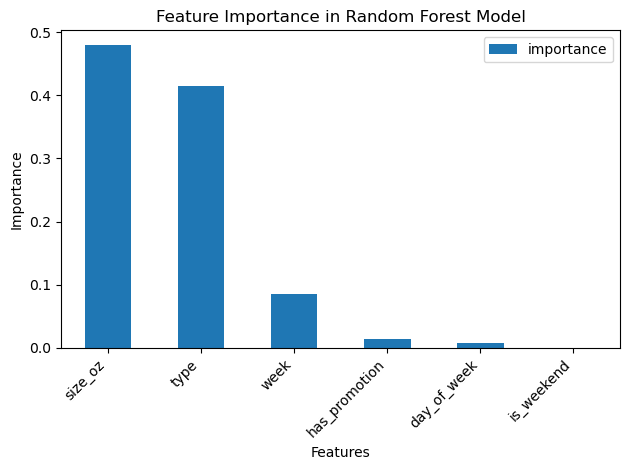

In [84]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(x='feature', y='importance', kind='bar')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [85]:
# Predict future sales (example for next week)
last_week = full_dataset['week'].max()
next_week_data = full_dataset[full_dataset['week'] == last_week].copy()
next_week_data['week'] = last_week + 1
next_week_predictions = rf_model.predict(next_week_data[X.columns])


In [86]:
print("\nPredicted sales for next week:")
print(f"Total predicted sales: {next_week_predictions.sum():.2f}")
print(f"Average predicted sales per transaction: {next_week_predictions.mean():.2f}")



Predicted sales for next week:
Total predicted sales: 23860.19
Average predicted sales per transaction: 1.44


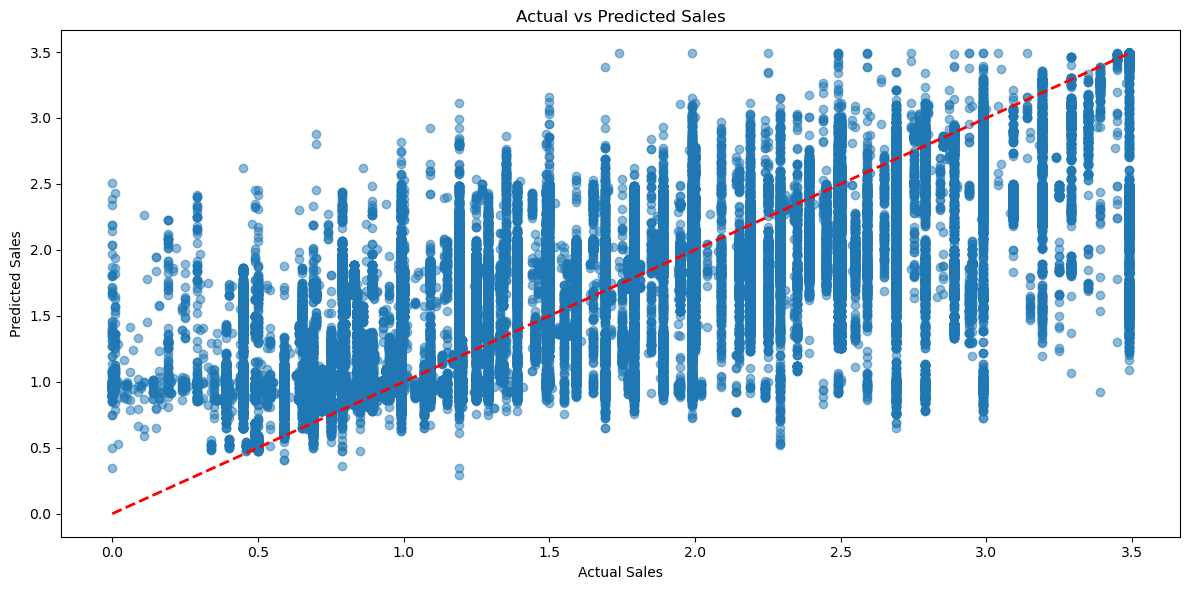

In [94]:
# Plot actual vs predicted sales
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.tight_layout()
plt.show()

Promotion Effectiveness

In [95]:
promo_effect = full_dataset.groupby('has_promotion')['total_sales'].mean()
print("\nAverage sales with and without promotions:")
print(promo_effect)



Average sales with and without promotions:
has_promotion
0    1.556388
1    1.398274
Name: total_sales, dtype: float64


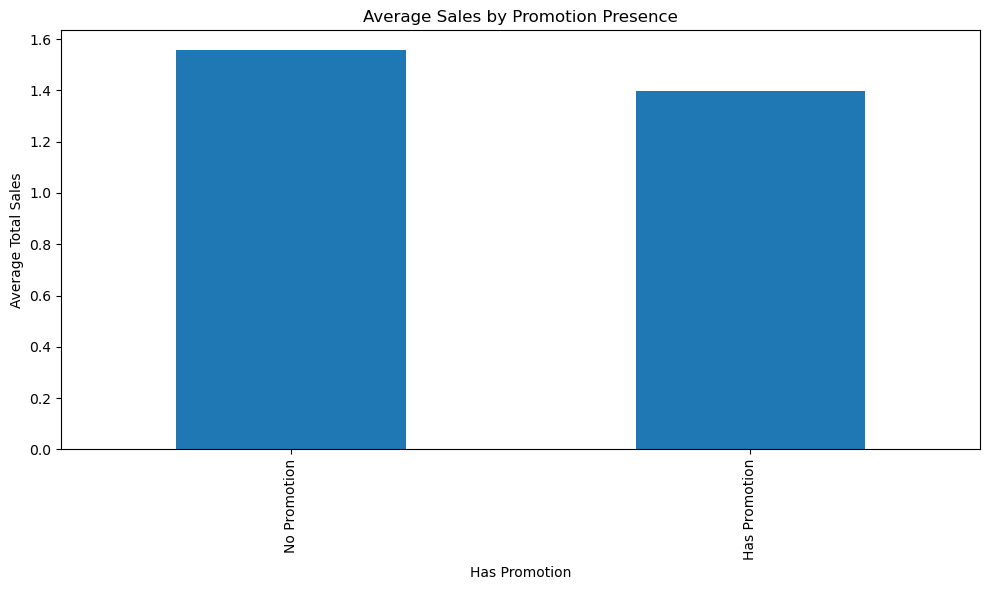

In [117]:
# Analyze the effect of promotions on sales
promo_effect = full_dataset.groupby('has_promotion')['total_sales'].mean()

plt.figure(figsize=(10, 6))
promo_effect.plot(kind='bar')
plt.title('Average Sales by Promotion Presence')
plt.xlabel('Has Promotion')
plt.ylabel('Average Total Sales')
plt.xticks([0, 1], ['No Promotion', 'Has Promotion'])
plt.tight_layout()
plt.show()

In [97]:
# Analyze different types of promotions
promo_type_effect = full_dataset.groupby('feature')['total_sales'].mean().sort_values(ascending=False)
print("\nAverage sales by promotion type:")
print(promo_type_effect)


Average sales by promotion type:
feature
5    1.933006
2    1.736972
4    1.556388
3    1.487932
1    1.393783
0    1.393006
6    1.230348
Name: total_sales, dtype: float64


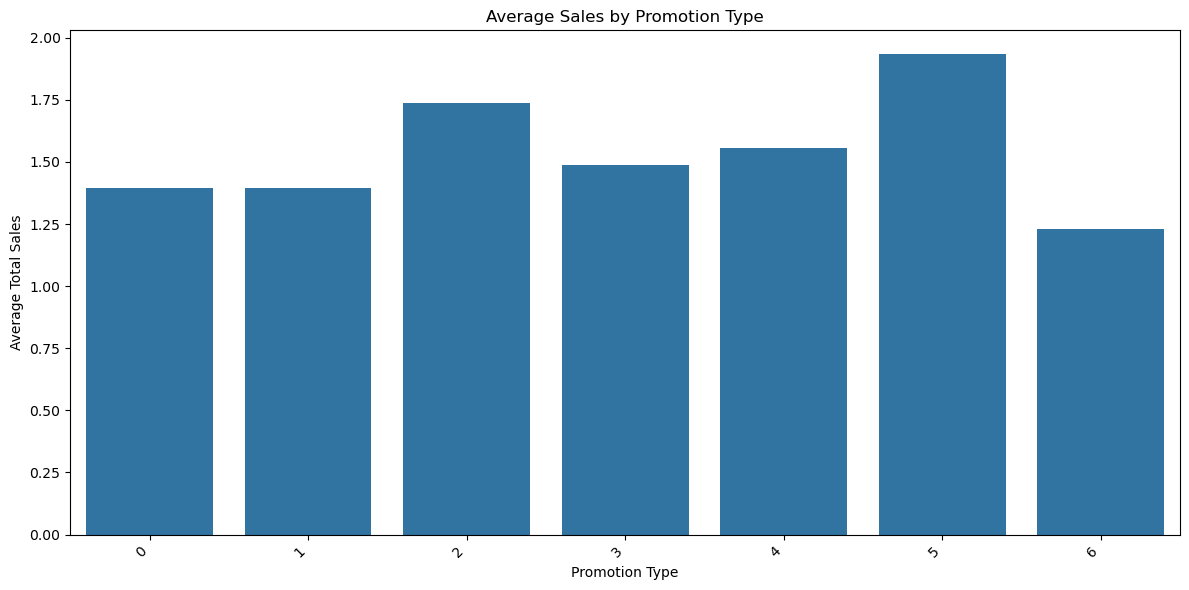

In [98]:
# Visualize promotion type effectiveness
plt.figure(figsize=(12, 6))
sns.barplot(x=promo_type_effect.index, y=promo_type_effect.values)
plt.title('Average Sales by Promotion Type')
plt.xlabel('Promotion Type')
plt.ylabel('Average Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Customer Segmentation

In [102]:
# Prepare data for clustering
cluster_data = full_dataset.groupby('customerId').agg({
    'total_sales': 'sum',
    'units': 'sum',
    'amount': 'mean',
    'is_weekend': 'mean',
    'has_promotion': 'mean'
}).reset_index()


In [103]:
# Normalize the data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data.drop('customerId', axis=1))


In [104]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [105]:
# Analyze the clusters
cluster_summary = cluster_data.groupby('Cluster').mean()
print("\nCustomer Segment Characteristics:")
print(cluster_summary)


Customer Segment Characteristics:
            customerId  total_sales      units    amount  is_weekend  \
Cluster                                                                
0        205215.868285     3.903484   2.562645  1.570332    0.043627   
1        195047.171121    17.648474  11.141540  1.623269    0.270479   
2        200574.439298     3.287673   2.383433  1.393365    0.269360   
3        209056.603538     3.888970   2.531240  1.571073    0.833490   

         has_promotion  
Cluster                 
0             0.021510  
1             0.077288  
2             0.702520  
3             0.021142  


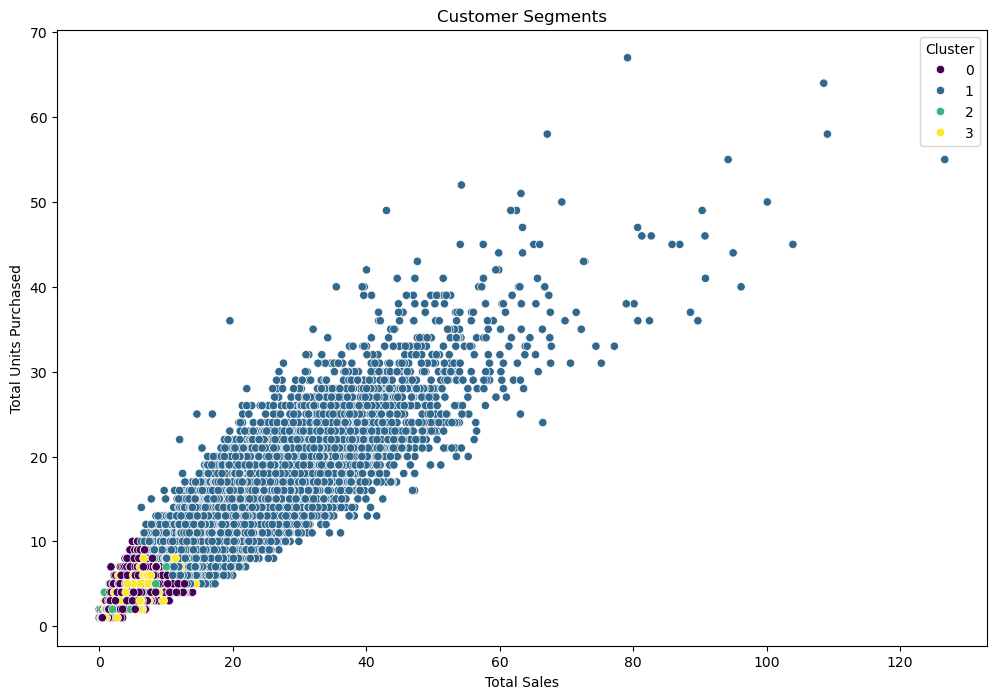

In [106]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cluster_data, x='total_sales', y='units', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Total Sales')
plt.ylabel('Total Units Purchased')
plt.show()


Overall analysis

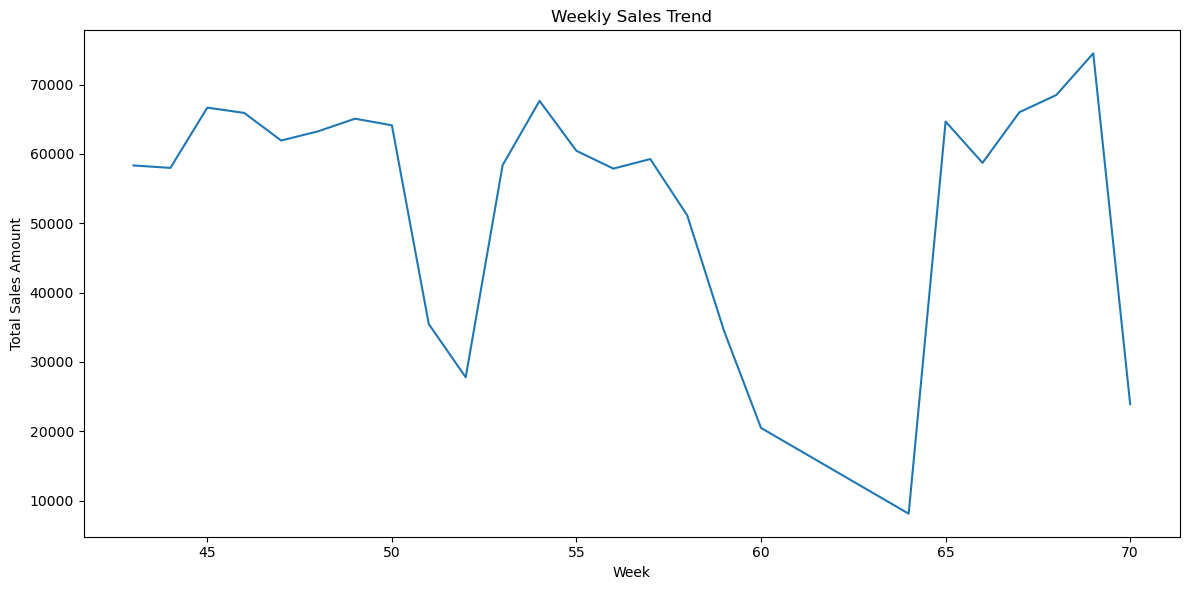

In [107]:
# Sales Trends Analysis
plt.figure(figsize=(12, 6))
weekly_sales = full_dataset.groupby('week')['amount'].sum().reset_index()
plt.plot(weekly_sales['week'], weekly_sales['amount'])
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.show()

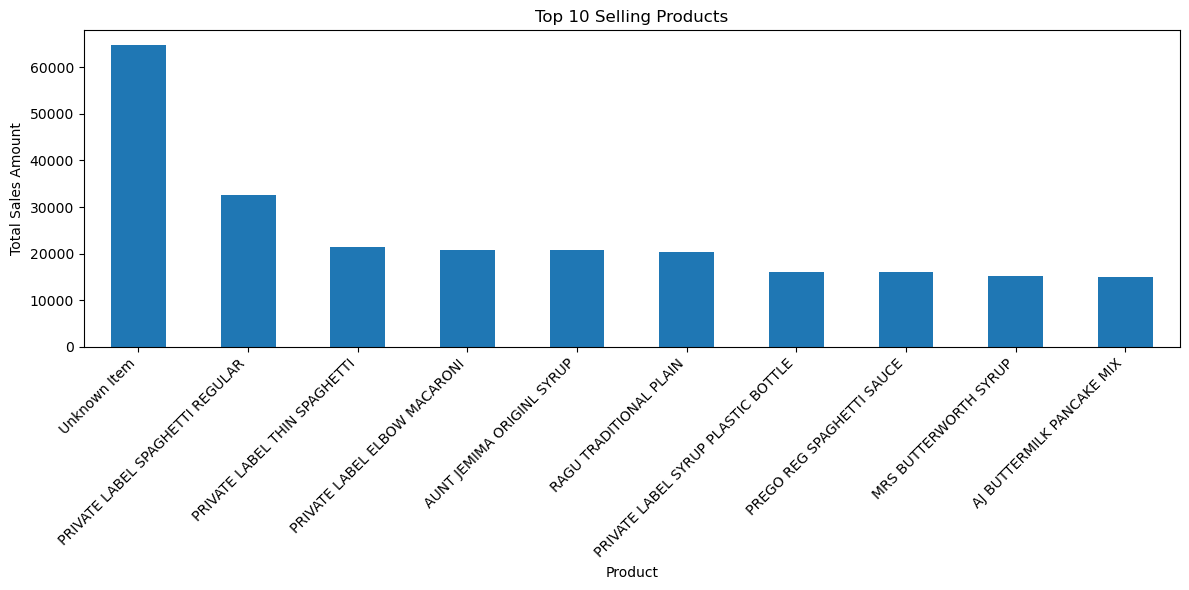

In [108]:
# top 10 selling products
top_products = full_dataset.groupby(['descrption'])['amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

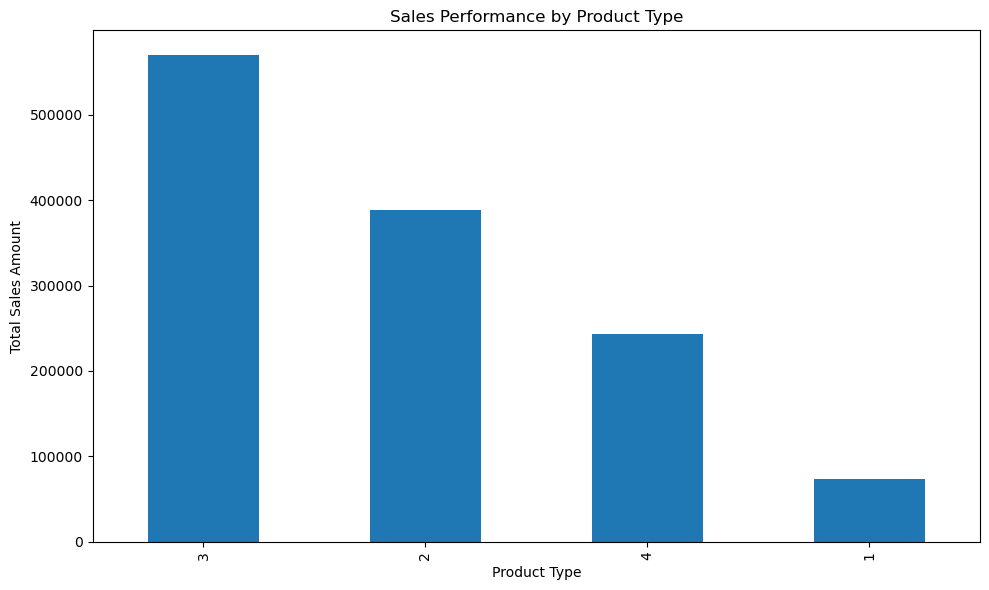

In [110]:
#Product Type Analysis
type_performance = full_dataset[full_dataset['type'] != 0].groupby('type')['amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
type_performance.plot(kind='bar')
plt.title('Sales Performance by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.show()

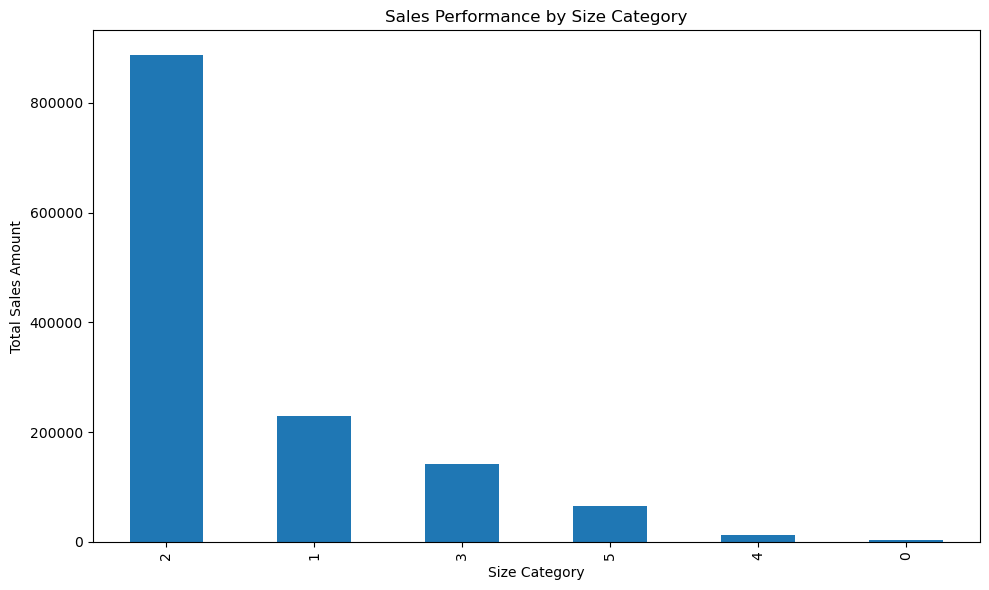

In [111]:
#Size Category Analysis
size_performance = full_dataset.groupby('size_category')['amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
size_performance.plot(kind='bar')
plt.title('Sales Performance by Size Category')
plt.xlabel('Size Category')
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.show()


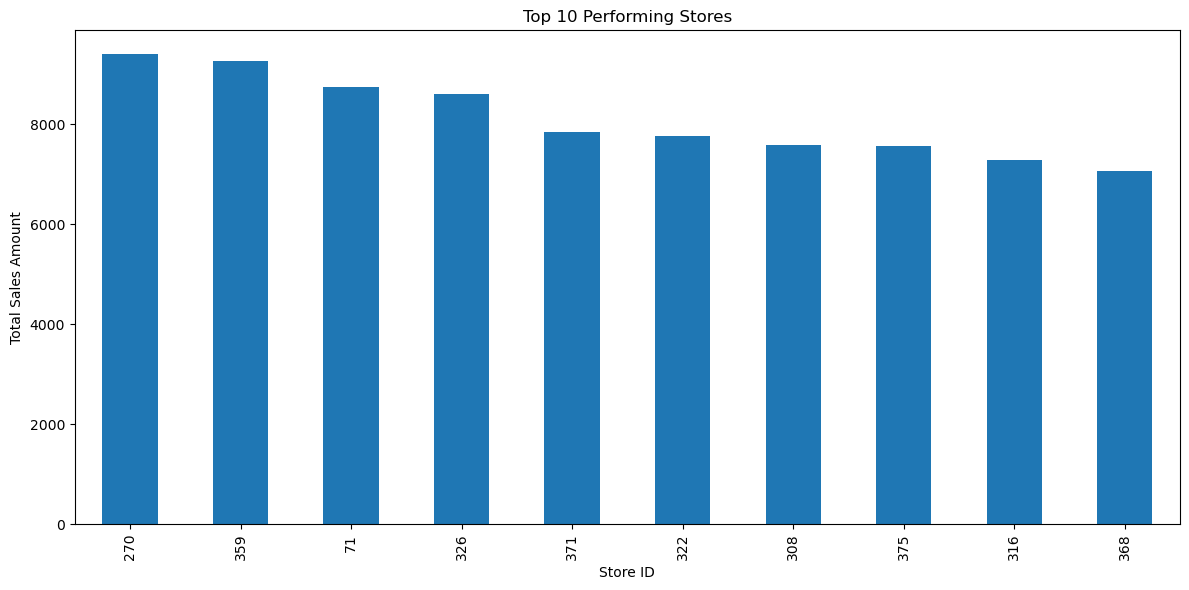

In [113]:
# Store Performance
store_performance = full_dataset.groupby('supermarket_id')['amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
store_performance.plot(kind='bar')
plt.title('Top 10 Performing Stores')
plt.xlabel('Store ID')
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.show()


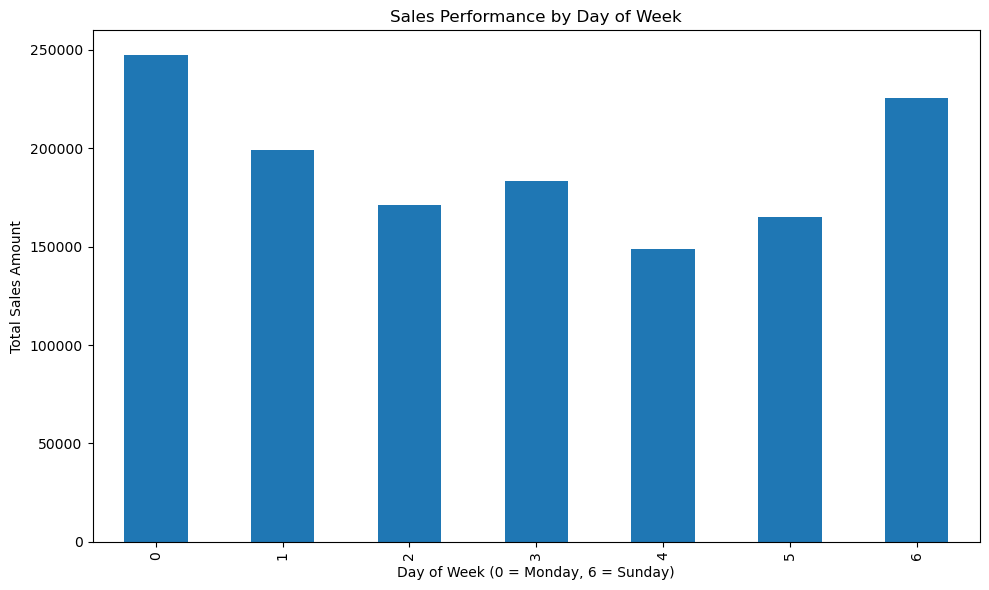

In [114]:
# Day of Week Analysis
full_dataset['day_of_week'] = pd.to_datetime(full_dataset['day'], format='%j').dt.dayofweek
day_performance = full_dataset.groupby('day_of_week')['amount'].sum()
plt.figure(figsize=(10, 6))
day_performance.plot(kind='bar')
plt.title('Sales Performance by Day of Week')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.show()

In [115]:
# Print summary statistics
print("Summary Statistics:")
print("\nTotal Sales Amount: $", full_dataset['amount'].sum())
print("Average Transaction Amount: $", full_dataset['amount'].mean())
print("Total Number of Transactions:", len(full_dataset))
print("Number of Unique Customers:", full_dataset['customerId'].nunique())
print("Number of Unique Products:", full_dataset['code'].nunique())

Summary Statistics:

Total Sales Amount: $ 1340657.1599999995
Average Transaction Amount: $ 1.5438546816324128
Total Number of Transactions: 868383
Number of Unique Customers: 233953
Number of Unique Products: 697


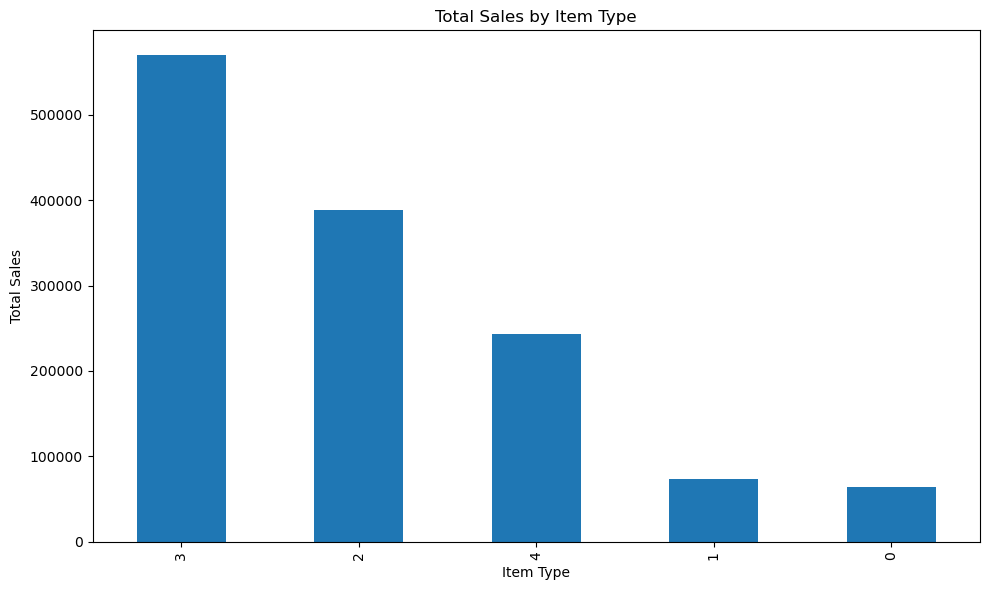

In [116]:
# 1. Sales by item type
sales_by_type = full_dataset.groupby('type')['amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sales_by_type.plot(kind='bar')
plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

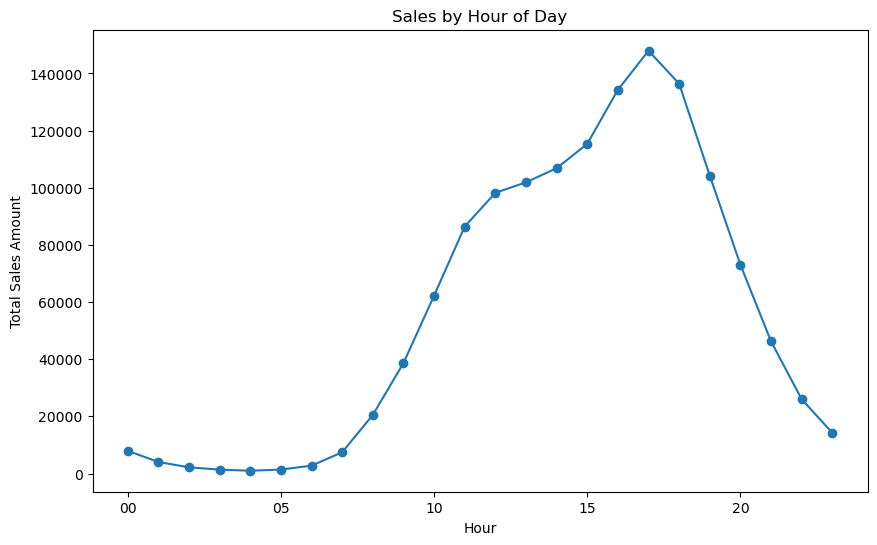

In [119]:
# Time-based Analysis
hourly_sales = full_dataset.groupby(full_dataset['time'].astype(str).str[:2])['amount'].sum()
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', marker='o')
plt.title('Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Sales Amount')
plt.show()

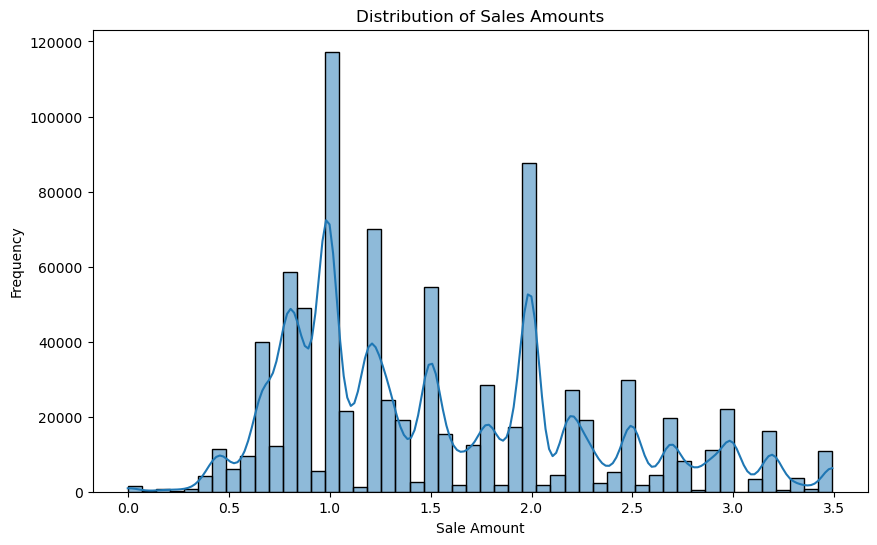

In [120]:
# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(full_dataset['amount'], bins=50, kde=True)
plt.title('Distribution of Sales Amounts')
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')
plt.show()


In [122]:
# Save the prepared dataset
full_dataset.to_csv('../Data/Prepared_sales_data.csv', index=False)

In [123]:
full_dataset.head(10)

,code,amount,units,time,province,week,customerId,supermarket_id,basket,day,...,size_oz,size_category,is_bulk,feature,display,postal-code,has_promotion,day_of_week,is_weekend,total_sales
0,7680850106,0.80,1,11:00:00,2,43,125434,244,1,1,...,16.0,2,0,4,5,40222,0,0,0,0.80
1,1800028064,2.25,1,11:37:00,2,43,108320,244,2,1,...,24.0,5,2,4,5,40222,0,0,0,2.25
2,9999985067,0.85,1,11:48:00,2,43,162016,244,3,1,...,16.0,2,0,4,5,40222,0,0,0,0.85
3,9999985131,2.19,1,13:23:00,2,43,89437,244,4,1,...,16.0,2,0,4,5,40222,0,0,0,2.19
4,5100002794,2.19,1,13:23:00,2,43,89437,244,4,1,...,26.0,2,0,4,5,40222,0,0,0,2.19
5,1800000957,3.45,1,14:15:00,2,43,158549,244,5,1,...,27.6,2,0,4,5,40222,0,0,0,3.45
6,9999985051,1.29,1,14:15:00,2,43,158549,244,5,1,...,32.0,1,0,4,5,40222,0,0,0,1.29
7,9999985053,0.75,1,15:13:00,2,43,18851,244,6,1,...,16.0,2,0,0,4,40222,1,0,0,0.75
8,3620000446,2.19,1,15:23:00,2,43,118337,244,7,1,...,26.0,2,0,4,5,40222,0,0,0,2.19
9,3340060177,1.50,1,16:24:00,2,43,8283,244,8,1,...,16.0,2,0,4,5,40222,0,0,0,1.50
